In [6]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [7]:
PATH = (r'C:\Users\Maciek\Desktop\DANE\PYTHON\Formula-1\weather_new')
df = pd.read_csv(PATH)
print(df.columns)
df

Index(['Unnamed: 0', 'M_PACKET_FORMAT', 'M_GAME_MAJOR_VERSION',
       'M_GAME_MINOR_VERSION', 'M_PACKET_VERSION', 'M_PACKET_ID',
       'M_SESSION_UID', 'M_SESSION_TIME', 'M_FRAME_IDENTIFIER',
       'M_PLAYER_CAR_INDEX', 'M_SECONDARY_PLAYER_CAR_INDEX',
       'M_BRAKING_ASSIST', 'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST',
       'TIMESTAMP', 'M_PIT_STOP_WINDOW_IDEAL_LAP', 'M_TRACK_TEMPERATURE',
       'M_TRACK_LENGTH', 'M_GAME_PAUSED', 'M_FORECAST_ACCURACY', 'GAMEHOST',
       'M_AIR_TEMPERATURE', 'M_NUM_WEATHER_FORECAST_SAMPLES',
       'M_SLI_PRO_NATIVE_SUPPORT', 'M_SAFETY_CAR_STATUS', 'M_TRACK_ID',
       'M_ERSASSIST', 'M_FORMULA', 'M_SEASON_LINK_IDENTIFIER', 'M_PIT_ASSIST',
       'M_GEARBOX_ASSIST', 'M_SESSION_TYPE', 'M_SPECTATOR_CAR_INDEX',
       'M_PIT_STOP_WINDOW_LATEST_LAP', 'M_WEEKEND_LINK_IDENTIFIER',
       'M_DYNAMIC_RACING_LINE_TYPE', 'M_SESSION_TIME_LEFT',
       'M_SESSION_DURATION', 'M_PIT_STOP_REJOIN_POSITION',
       'M_WEATHER_FORECAST_SAMPLES_M_SESSION

,Unnamed: 0,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,...,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
0,17038,2021,1,14,1,1,2939734289500381696,65.276,1647,0,...,31,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
1,17115,2021,1,14,1,1,2939734289500381696,65.779,1669,0,...,31,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
2,17192,2021,1,14,1,1,2939734289500381696,67.283,1704,0,...,31,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3,17269,2021,1,14,1,1,2939734289500381696,68.285,1742,0,...,31,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
4,17346,2021,1,14,1,1,2939734289500381696,69.288,1783,0,...,31,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35646,3571974,2021,1,14,1,1,10862815468833218560,679.037,22711,1,...,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
35647,3572051,2021,1,14,1,1,10862815468833218560,680.040,22752,1,...,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
35648,3572128,2021,1,14,1,1,10862815468833218560,681.039,22792,1,...,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
35649,3572205,2021,1,14,1,1,10862815468833218560,682.044,22833,1,...,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN


In [8]:
index_list = ['TIMESTAMP',
        'M_WEATHER',
        'M_TRACK_TEMPERATURE', 
        'M_FORECAST_ACCURACY', 
        'M_AIR_TEMPERATURE', 
        'M_NUM_WEATHER_FORECAST_SAMPLES', 
        'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE',
        'M_WEATHER_FORECAST_SAMPLES_M_WEATHER',
        'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE',
        'M_TRACK_TEMPERATURE_CHANGE',
        'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE',
        'M_AIR_TEMPERATURE_CHANGE', 
        'M_RAIN_PERCENTAGE',
        'M_WEATHER']

<AxesSubplot:>

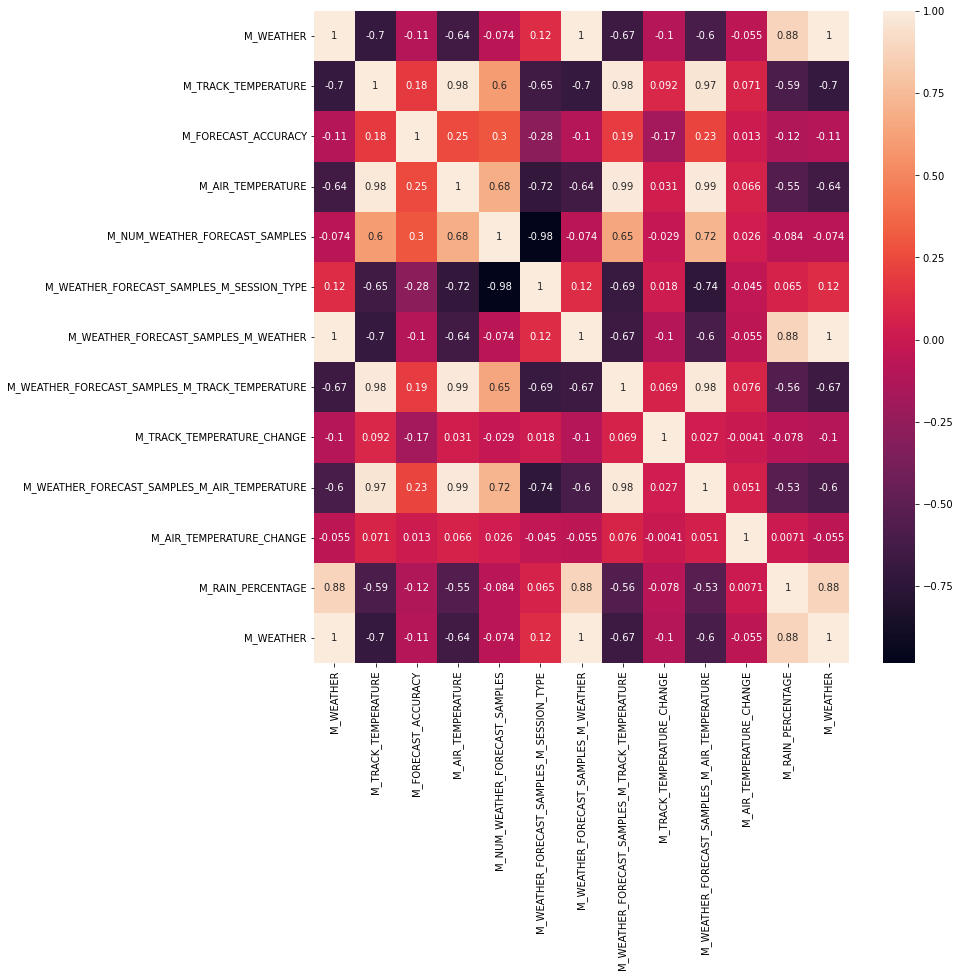

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df[index_list].corr(), annot=True)

In [10]:
race_ids = df['M_SESSION_UID'].unique()
race_ids

array([ 2939734289500381696,  3734445177271223808,  2148720622742364160,
        6740664712580023296,  7571059373791474688, 12353162835949107200,
       10606999475394856960, 12965771888842305536,  8577134997333479424,
       13859540119692961792,  5131882212211026944, 10924589045696636928,
       11725831002906730496,  2375253586702444032, 10208185256540704768,
        8562486677285334016,  4162814131879546368, 11410883316863320064,
        1844402308831118848,   731698304933047040,  7399509276955794432,
        7706848746807917568,  3688942053969944576,  6206021592960190464,
       17070085402106165248, 17986789450456119296, 10752148373787498496,
       10154977874364764160,   225678745705498656, 17761651970480412672,
        4579319030059534336,  7695536579992419328,  5057013239687063552,
       14604689668899229696,  8183544490995236864, 11927383548626350080,
        8837776980781088768, 10929277407573190656, 14423358407437291520,
        7876673241077905408,  8645451312818641920, 

In [11]:
df[df['M_SESSION_UID'] == 2939734289500381696][index_list]

,TIMESTAMP,M_WEATHER,M_TRACK_TEMPERATURE,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER
0,2022-01-21 01:16:50.000000,0,33,0,25,10,8.0,0.0,33.0,2.0,25.0,2.0,1.0,0
1,2022-01-21 01:16:51.000000,0,33,0,25,10,8.0,0.0,33.0,2.0,25.0,2.0,1.0,0
2,2022-01-21 01:16:52.000000,0,33,0,25,10,8.0,0.0,33.0,2.0,25.0,2.0,1.0,0
3,2022-01-21 01:16:53.000000,0,33,0,25,10,8.0,0.0,33.0,2.0,25.0,2.0,1.0,0
4,2022-01-21 01:16:54.000000,0,33,0,25,10,8.0,0.0,33.0,2.0,25.0,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12425,2022-01-21 01:28:27.000000,0,33,0,25,10,8.0,0.0,33.0,2.0,25.0,2.0,2.0,0
12426,2022-01-21 01:28:28.000000,0,33,0,25,10,8.0,0.0,33.0,2.0,25.0,2.0,2.0,0
12427,2022-01-21 01:28:29.000000,0,33,0,25,10,8.0,0.0,33.0,2.0,25.0,2.0,2.0,0
12428,2022-01-21 01:28:30.000000,0,33,0,25,10,8.0,0.0,33.0,2.0,25.0,2.0,2.0,0


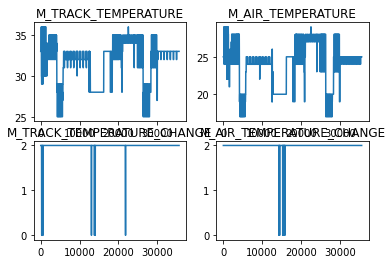

In [12]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].plot(df['M_TRACK_TEMPERATURE'])
ax[0,0].set_title('M_TRACK_TEMPERATURE')
ax[0,1].plot(df['M_AIR_TEMPERATURE'])
ax[0,1].set_title('M_AIR_TEMPERATURE')

ax[1,0].plot(df['M_TRACK_TEMPERATURE_CHANGE'])
ax[1,0].set_title('M_TRACK_TEMPERATURE_CHANGE')
ax[1,1].plot(df['M_AIR_TEMPERATURE_CHANGE'])
ax[1,1].set_title('M_AIR_TEMPERATURE_CHANGE')

plt.show()

In [13]:
# for deep learning models we need a data always to be in some kind of input matrix (if its more complicated it might become a 3d or 4d tensor)
# matrix where each row gona be our inputs and it has corresponding label
# we gona end with something a bit more complicated than matrix

# we gona predict for every 5 hours a temp for next hour
# so for 1,2,3,4,5 hour we predict 6 hour, and then after we get 6 hour we bump it over one step - we 'drop' 1 hour and take 6 hour instead and we try to predict 7 hour

# X=[[[1], [2], [3], [4], [5]]]; Y=[6]
# X=[[[2], [3], [4], [5], [6]]]; Y=[7]
# X=[[[3], [4], [5], [6], [7]]]; Y=[8]

# we can se above the X matrix and Y vector (input and corresponding output)
# its creating supervised learning model to forecasting problem

# The X matrix looks like this - each hour is wrapped in a list because if we were to do multivariate (more variables), 
# then we might include other sorts of variables in this lists as well e.g. [temperature, pressure, humidity]:
# X=[[[1, 2, 1], [2, 2, 1], [3, 3, 2], [4, 2, 3], [5, 2, 1]]]; Y=[6]

#X matrix is actually a 3d tensor


def df_to_X_y(df, window_size=5):
  """
  This function returns X array and y array 

  Parameters:
    df (dataframe): our dataframe
    window_size (int): this parameter decides how many last measurements we gonna take into consideration
  """
  df_as_np =df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    # we taking 5 values and put them in a list separately
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    # label is the next value after row
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)


In [14]:
WINDOW_SIZE = 5
weather = df[df['M_SESSION_UID'] == 2939734289500381696]['M_WEATHER']
X, y = df_to_X_y(weather, WINDOW_SIZE)
X.shape, y.shape

((535, 5, 1), (535,))

In [15]:
X

array([[[0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0]]], dtype=int64)

In [16]:
# split to train validation
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(535, 5, 1) (535,)
(0, 5, 1) (0,)
(0, 5, 1) (0,)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [18]:
model1 = Sequential()
# we specify 5 by 1 vector as an input
model1.add(InputLayer((5, 1)))
# we pass it to neural network (we can use GRU as well)
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
# we want linear value, we want to predict temp (positive or negative) so we want it to be linear
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [19]:
# cp1 tells the model to save when validation loss is the smallest
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [20]:
# each epoch should decrease the loss, we can tune learning_rate to increase the the performance
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
17/17 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00
Epoch 2/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00
Epoch 3/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00
Epoch 4/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00
Epoch 5/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00
Epoch 6/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00
Epoch 8/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00
Epoch 9/10
17/17 [==============

In [21]:
# it loads the model into memory
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

OSError: No file or directory found at model1/

In [ ]:
# we flatten becouse we dont want to have the X=[[[3], [4], [5], [6], [7]]] -> X=[[3, 4, 5, 6, 7]] inner brackets
train_predictions = model1.predict(X_train).flatten()
# we make a dataframe from results put in dict, and show it below
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,2.424923,25
1,2.424923,25
2,2.424923,25
3,2.424923,25
4,2.424923,25
...,...,...
530,2.424923,25
531,2.424923,25
532,2.424923,25
533,2.424923,25


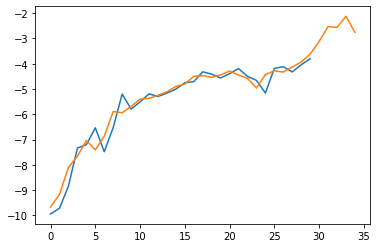

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:30])
plt.plot(train_results['Actuals'][:35])

In [ ]:
# the same thing for validation data
# we flatten becouse we dont want to have the X=[[[3], [4], [5], [6], [7]]] -> X=[[3, 4, 5, 6, 7]] inner brackets
val_predictions = model1.predict(X_val).flatten()
# we make a dataframe from results put in dict, and show it below
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,15.409070,14.02
1,13.212512,13.67
2,13.006639,12.27
3,11.440801,11.19
4,10.369304,10.85
...,...,...
4995,17.201103,18.27
4996,17.274326,17.85
4997,17.172581,16.65
4998,15.805168,15.85


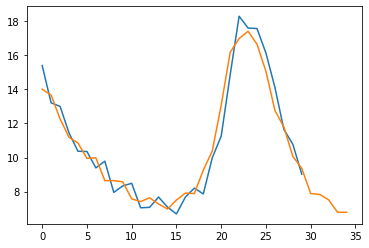

In [ ]:
plt.plot(val_results['Val Predictions'][:30])
plt.plot(val_results['Actuals'][:35])

In [ ]:
# the same thing for test data
# we flatten becouse we dont want to have the X=[[[3], [4], [5], [6], [7]]] -> X=[[3, 4, 5, 6, 7]] inner brackets
test_predictions = model1.predict(X_test).flatten()
# we make a dataframe from results put in dict, and show it below
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,14.339602,13.99
1,13.193974,13.46
2,12.830700,12.93
3,12.430062,12.43
4,11.992962,12.17
...,...,...
5081,-1.175275,-0.98
5082,-1.516090,-1.40
5083,-1.734806,-2.75
5084,-3.098130,-2.89


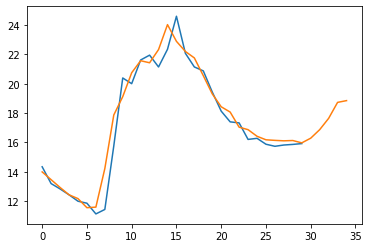

In [ ]:
plt.plot(test_results['Test Predictions'][:30])
plt.plot(test_results['Actuals'][:35])

In [ ]:
# CONVULTIONAL NEURAL NETWORK
# https://towardsdatascience.com/a-comparison-of-dnn-cnn-and-lstm-using-tf-keras-2191f8c77bbe

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             192       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 1s 555us/step - loss: 5.1593 - root_mean_squared_error: 2.2714 - val_loss: 0.9678 - val_root_mean_squared_error: 0.9838
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 2/10
1875/1875 [==============================] - 1s 548us/step - loss: 1.0760 - root_mean_squared_error: 1.0373 - val_loss: 0.7259 - val_root_mean_squared_error: 0.8520
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 3/10
1875/1875 [==============================] - 1s 524us/step - loss: 0.8212 - root_mean_squared_error: 0.9062 - val_loss: 0.6807 - val_root_mean_squared_error: 0.8251
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 4/10
1875/1875 [==============================] - 1s 517us/step - loss: 0.7286 - root_mean_squared_error: 0.8536 - val_loss: 0.5485 - val_root_mean_squared_error: 0.7406
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 5/10
1875/1875 [==============================] - 1s 520us/step - loss: 0.6930 - root_mean_squared_error: 0.8324 - val_loss: 0.5109 - val_root_mean_squared_error: 0.7148
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 6/10
1875/1875 [==============================] - 1s 517us/step - loss: 0.6802 - root_mean_squared_error: 0.8248 - val_loss: 0.4994 - val_root_mean_squared_error: 0.7067
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 7/10
1875/1875 [==============================] - 1s 529us/step - loss: 0.6653 - root_mean_squared_error: 0.8157 - val_loss: 0.5108 - val_root_mean_squared_error: 0.7147
Epoch 8/10
1875/1875 [==============================] - 1s 523us/step - loss: 0.6595 - root_mean_squared_error: 0.8121 - val_loss: 0.4986 - val_root_mean_squared_error: 0.7061
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 9/10
1875/1875 [==============================] - 1s 521us/step - loss: 0.6568 - root_mean_squared_error: 0.8104 - val_loss: 0.5119 - val_root_mean_squared_error: 0.7155
Epoch 10/10
1875/1875 [==============================] - 1s 517us/step - loss: 0.6524 - root_mean_squared_error: 0.8077 - val_loss: 0.4952 - val_root_mean_squared_error: 0.7037
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


In [ ]:
# Gated Recurring Units
# more prone to overfitting if you got more parameters and more complexity
"""GRU couples forget as well as input gates. GRU use less training parameters and therefore use less memory, 
execute faster and train faster than LSTM's whereas LSTM is more accurate on dataset using longer sequence. 
In short, if sequence is large or accuracy is very critical, please go for LSTM whereas for less memory consumption and 
faster operation go for GRU. If you donot have much floating point operations per second (FLOP's) to spare switch to GRU. 
LSTM has three values at output (output, hidden and cell) whereas GRU has two values at output (output and hidden)."""

"GRU couples forget as well as input gates. GRU use less training parameters and therefore use less memory, \nexecute faster and train faster than LSTM's whereas LSTM is more accurate on dataset using longer sequence. \nIn short, if sequence is large or accuracy is very critical, please go for LSTM whereas for less memory consumption and \nfaster operation go for GRU. If you donot have much floating point operations per second (FLOP's) to spare switch to GRU. \nLSTM has three values at output (output, hidden and cell) whereas GRU has two values at output (output and hidden)."

In [ ]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 40.0385 - root_mean_squared_error: 6.3276 - val_loss: 1.0862 - val_root_mean_squared_error: 1.0422


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9412 - root_mean_squared_error: 1.3933 - val_loss: 0.6945 - val_root_mean_squared_error: 0.8334


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9428 - root_mean_squared_error: 0.9710 - val_loss: 0.5724 - val_root_mean_squared_error: 0.7565


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7475 - root_mean_squared_error: 0.8646 - val_loss: 0.5256 - val_root_mean_squared_error: 0.7250


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6892 - root_mean_squared_error: 0.8302 - val_loss: 0.5108 - val_root_mean_squared_error: 0.7147


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6682 - root_mean_squared_error: 0.8175 - val_loss: 0.5119 - val_root_mean_squared_error: 0.7155
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6585 - root_mean_squared_error: 0.8115 - val_loss: 0.4898 - val_root_mean_squared_error: 0.6999


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6550 - root_mean_squared_error: 0.8093 - val_loss: 0.5035 - val_root_mean_squared_error: 0.7096
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6506 - root_mean_squared_error: 0.8066 - val_loss: 0.5037 - val_root_mean_squared_error: 0.7097
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6475 - root_mean_squared_error: 0.8047 - val_loss: 0.5231 - val_root_mean_squared_error: 0.7233


## MULTIVARIATE TIME SERIES

In [ ]:
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [ ]:
# we are making pd with one column
temp_df = pd.DataFrame({'Temperature': temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [ ]:
# making signals:
# we doin this couse this columns have some better or worse function approx
# in a year and in a day the temp is dropping down and goin up in some intervals
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds']*np.pi / day)
temp_df['Day cos'] = np.cos(temp_df['Seconds']*np.pi / day)
temp_df['Year sin'] = np.sin(temp_df['Seconds']*np.pi / day)
temp_df['Year cos'] = np.cos(temp_df['Seconds']*np.pi / day)

In [ ]:
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,-0.130526,-0.991445,-0.130526,-0.991445
2009-01-01 02:00:00,-8.88,-0.258819,-0.965926,-0.258819,-0.965926
2009-01-01 03:00:00,-8.81,-0.382683,-0.923880,-0.382683,-0.923880
2009-01-01 04:00:00,-9.05,-0.500000,-0.866025,-0.500000,-0.866025
2009-01-01 05:00:00,-9.63,-0.608761,-0.793353,-0.608761,-0.793353
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,0.591310,-0.806445,0.591310,-0.806445
2016-12-31 20:10:00,-1.40,0.480989,-0.876727,0.480989,-0.876727
2016-12-31 21:10:00,-2.75,0.362438,-0.932008,0.362438,-0.932008


In [ ]:
# we dropping seconds couse they are irrelevant (we got colinearity with rest of columns)

# temp_df = temp_df.drop('Seconds', axis=1)
# temp_df.head(5)

In [ ]:
# ds - day sin
# dc - day cos
# ys - year sin
# yc - year cos
# X=[[[t1, ds1, dc1], [t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5]]]; Y=[t6]
# X=[[[t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6]]]; Y=[t7]
# X=[[[t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6], [t7, ds7]]]; Y=[t8]

def df_to_X_y2(df, window_size=6):
  """
  This function returns X array and y array 

  Parameters:
    df (dataframe): our dataframe
    window_size (int): this parameter decides how many last measurements we gonna take into consideration
  """
  df_as_np =df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    # we taking 5 values and put them in a list separately
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    # label is the next value after row
    # adding [0] to append just the temp value
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)


In [ ]:
X2, y2 = df_to_X_y2(temp_df, window_size=6)
X2.shape, y2.shape
# X2 shape (num of samples, window_size-how many last measurements we taking into consideration, len of one vector - how many features we taking into consideration)

((70085, 6, 5), (70085,))

In [ ]:
# split to train validation
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]

print(X2_train.shape, y2_train.shape)
print(X2_val.shape, y2_val.shape)
print(X2_test.shape, y2_test.shape)

(60000, 6, 5) (60000,)
(5000, 6, 5) (5000,)
(5085, 6, 5) (5085,)


In [ ]:
# we making standarization on data
# in some strange way but thats how we do it on tensors ???

#we countind mean and std based on 1 column - temp
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
    return X

In [ ]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -6.08761429e-01,  7.93353340e-01,
         -6.08761429e-01,  7.93353340e-01],
        [ 9.90732794e-01, -5.00000000e-01,  8.66025404e-01,
         -5.00000000e-01,  8.66025404e-01],
        [ 8.49692028e-01, -3.82683432e-01,  9.23879533e-01,
         -3.82683432e-01,  9.23879533e-01],
        [ 7.55664851e-01, -2.58819045e-01,  9.65925826e-01,
         -2.58819045e-01,  9.65925826e-01],
        [ 6.66339032e-01, -1.30526192e-01,  9.91444861e-01,
         -1.30526192e-01,  9.91444861e-01],
        [ 5.37051663e-01, -3.58237185e-12,  1.00000000e+00,
         -3.58237185e-12,  1.00000000e+00]],

       [[ 9.90732794e-01, -5.00000000e-01,  8.66025404e-01,
         -5.00000000e-01,  8.66025404e-01],
        [ 8.49692028e-01, -3.82683432e-01,  9.23879533e-01,
         -3.82683432e-01,  9.23879533e-01],
        [ 7.55664851e-01, -2.58819045e-01,  9.65925826e-01,
         -2.58819045e-01,  9.65925826e-01],
        [ 6.66339032e-01, -1.30526192e-01,  9.91444861e-01,
  

In [ ]:
model4 = Sequential()
# we specify 6 by 5 vector as an input
# we got 6 time steps and 5 features of interest
model4.add(InputLayer((6, 5)))
# we pass it to neural network (we can use GRU as well)
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
# we want linear value, we want to predict temp (positive or negative) so we want it to be linear
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
# each epoch should decrease the loss, we can tune learning_rate to increase the the performance
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 47.1535 - root_mean_squared_error: 6.8668 - val_loss: 4.9862 - val_root_mean_squared_error: 2.2330


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5054 - root_mean_squared_error: 2.3464 - val_loss: 2.3778 - val_root_mean_squared_error: 1.5420


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2340 - root_mean_squared_error: 1.4947 - val_loss: 1.1465 - val_root_mean_squared_error: 1.0708


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2014 - root_mean_squared_error: 1.0961 - val_loss: 0.7950 - val_root_mean_squared_error: 0.8916


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8640 - root_mean_squared_error: 0.9295 - val_loss: 0.6016 - val_root_mean_squared_error: 0.7756


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6933 - root_mean_squared_error: 0.8326 - val_loss: 0.5057 - val_root_mean_squared_error: 0.7112


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6112 - root_mean_squared_error: 0.7818 - val_loss: 0.4681 - val_root_mean_squared_error: 0.6842


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5823 - root_mean_squared_error: 0.7631 - val_loss: 0.4553 - val_root_mean_squared_error: 0.6748


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5700 - root_mean_squared_error: 0.7550 - val_loss: 0.4542 - val_root_mean_squared_error: 0.6740


INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5667 - root_mean_squared_error: 0.7528 - val_loss: 0.4547 - val_root_mean_squared_error: 0.6743


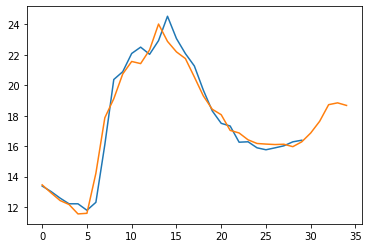

In [ ]:
# the same thing for test data
# we flatten becouse we dont want to have the X=[[[3], [4], [5], [6], [7]]] -> X=[[3, 4, 5, 6, 7]] inner brackets
test_predictions = model4.predict(X2_test).flatten()
# we make a dataframe from results put in dict, and show it below
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y2_test})
test_results

plt.plot(test_results['Test Predictions'][:30])
plt.plot(test_results['Actuals'][:35])

## MULTIVARIATE TIME SERIES AND OUTPUT

In [ ]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,-0.130526,-0.991445,-0.130526,-0.991445
2009-01-01 02:00:00,996.62,-8.88,-0.258819,-0.965926,-0.258819,-0.965926
2009-01-01 03:00:00,996.84,-8.81,-0.382683,-0.923880,-0.382683,-0.923880
2009-01-01 04:00:00,996.99,-9.05,-0.500000,-0.866025,-0.500000,-0.866025
2009-01-01 05:00:00,997.46,-9.63,-0.608761,-0.793353,-0.608761,-0.793353


In [ ]:
# ds - day sin
# dc - day cos
# ys - year sin
# yc - year cos
# X=[[[t1, ds1, dc1], [t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5]]]; Y=[t6]
# X=[[[t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6]]]; Y=[t7]
# X=[[[t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6], [t7, ds7]]]; Y=[t8]

def df_to_X_y3(df, window_size=7):
  """
  This function returns X array and y array 

  Parameters:
    df (dataframe): our dataframe
    window_size (int): this parameter decides how many last measurements we gonna take into consideration
  """
  df_as_np =df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    # label is the next value after row
    # adding [0] to append just the temp value and now we add as well second param 
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [ ]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [ ]:
# now we need to std also a output due to different value range of them - to get the loss function work properly

# [0] becaouse we taking first column
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

# [1] because we taking second column
temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
    X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
    return X

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [ ]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-1.07355644e+00,  1.04009390e+00, -6.08761429e-01,
          7.93353340e-01, -6.08761429e-01,  7.93353340e-01],
        [-1.00807435e+00,  9.90728707e-01, -5.00000000e-01,
          8.66025404e-01, -5.00000000e-01,  8.66025404e-01],
        [-9.51080673e-01,  8.49685305e-01, -3.82683432e-01,
          9.23879533e-01, -3.82683432e-01,  9.23879533e-01],
        ...,
        [-8.80748054e-01,  6.66328883e-01, -1.30526192e-01,
          9.91444861e-01, -1.30526192e-01,  9.91444861e-01],
        [-8.29817537e-01,  5.37039098e-01, -3.58237185e-12,
          1.00000000e+00, -3.58237185e-12,  1.00000000e+00],
        [-8.01927015e-01,  4.74744929e-01,  1.30526192e-01,
          9.91444861e-01,  1.30526192e-01,  9.91444861e-01]],

       [[-1.00807435e+00,  9.90728707e-01, -5.00000000e-01,
          8.66025404e-01, -5.00000000e-01,  8.66025404e-01],
        [-9.51080673e-01,  8.49685305e-01, -3.82683432e-01,
          9.23879533e-01, -3.82683432e-01,  9.23879533e-01],
        [-9.14701

In [ ]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [ ]:
model5 = Sequential()
# input layer first int should be the same as window size
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
# now we got 2 here, due to having 2 params: pressure and temp
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                18176     
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 18        
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1557 - root_mean_squared_error: 0.3945 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1851


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - root_mean_squared_error: 0.1633 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1350


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0930


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0084 - root_mean_squared_error: 0.0914 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0786


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0068 - root_mean_squared_error: 0.0824 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0712


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0771 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0665


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0055 - root_mean_squared_error: 0.0744 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0651


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0649


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0053 - root_mean_squared_error: 0.0725 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0653
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052 - root_mean_squared_error: 0.0722 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628


INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


In [ ]:
def plot_predictions(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.422467,0.412451,-0.780068,-0.793439
1,0.375417,0.353683,-0.774194,-0.763123
2,0.329064,0.323123,-0.743579,-0.721893
3,0.319674,0.250251,-0.693592,-0.652773
4,0.256855,0.254952,-0.606682,-0.652773
...,...,...,...,...
95,0.699166,0.716869,-0.407549,-0.416310
96,0.660983,0.687485,-0.410342,-0.399333
97,0.645981,0.663978,-0.394995,-0.399333
98,0.642959,0.641646,-0.389800,-0.400546


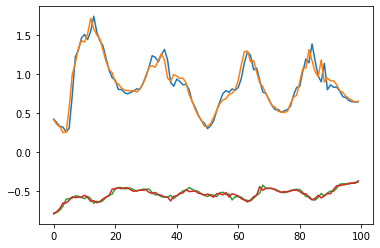

In [ ]:
post_processed_df = plot_predictions(model5, X3_test, y3_test)
post_processed_df

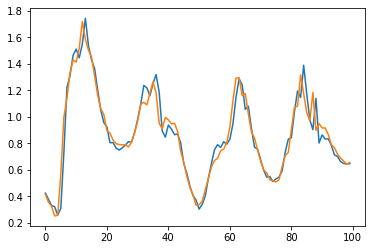

In [ ]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

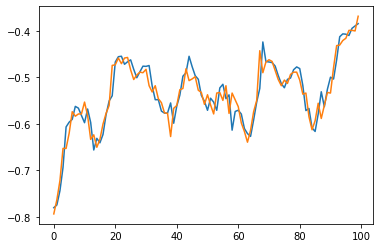

In [ ]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [ ]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,13.015222,12.93,982.540283,982.43
1,12.614920,12.43,982.588745,982.68
2,12.220540,12.17,982.841187,983.02
3,12.140651,11.55,983.253418,983.59
4,11.606188,11.59,983.970154,983.59
...,...,...,...,...
95,15.369381,15.52,985.612305,985.54
96,15.044514,15.27,985.589233,985.68
97,14.916876,15.07,985.715820,985.68
98,14.891172,14.88,985.758667,985.67


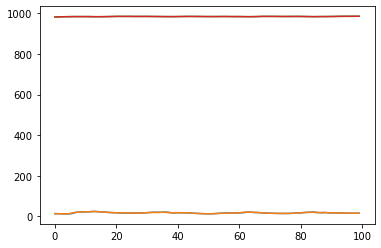

In [ ]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

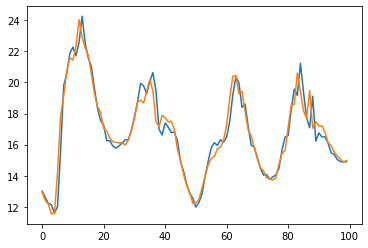

In [ ]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

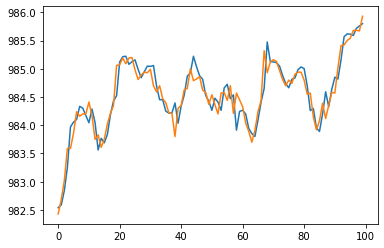

In [ ]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])